In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from numpy import argmax

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images = train_images[:5000]
train_labels = train_labels[:5000]
train_images, test_images = train_images / 255.0, test_images / 255.0

def display(history):
  plt.title(label='Model Loss by Epoch', loc='center')
  plt.plot(history.history['loss'], label='Training Data', color='red')
  plt.plot(history.history['val_loss'], label='Test Data', color='black')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(loc='upper right')
  plt.show()

170498071/170498071 [==============================] - 44s 0us/step


Epoch 1/10
157/157 [==============================] - 15s 81ms/step - loss: 2.0809 - accuracy: 0.2226 - val_loss: 1.8591 - val_accuracy: 0.3074
Epoch 2/10
157/157 [==============================] - 12s 75ms/step - loss: 1.7681 - accuracy: 0.3522 - val_loss: 1.7384 - val_accuracy: 0.3710
Epoch 3/10
157/157 [==============================] - 12s 77ms/step - loss: 1.6289 - accuracy: 0.4064 - val_loss: 1.5472 - val_accuracy: 0.4249
Epoch 4/10
157/157 [==============================] - 12s 75ms/step - loss: 1.4919 - accuracy: 0.4604 - val_loss: 1.4854 - val_accuracy: 0.4563
Epoch 5/10
157/157 [==============================] - 12s 74ms/step - loss: 1.3967 - accuracy: 0.4954 - val_loss: 1.4582 - val_accuracy: 0.4632
Epoch 6/10
157/157 [==============================] - 12s 77ms/step - loss: 1.3172 - accuracy: 0.5260 - val_loss: 1.3843 - val_accuracy: 0.4989
Epoch 7/10
157/157 [==============================] - 12s 77ms/step - loss: 1.2761 - accuracy: 0.5436 - val_loss: 1.3995 - val_accuracy:

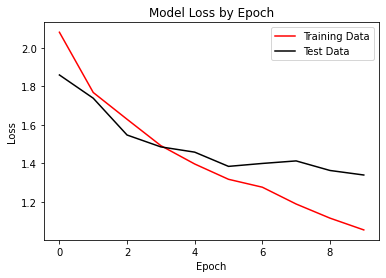

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
display(history)

Epoch 1/10
157/157 [==============================] - 23s 133ms/step - loss: 1.8350 - accuracy: 0.3346 - val_loss: 3.0893 - val_accuracy: 0.1002
Epoch 2/10
157/157 [==============================] - 15s 97ms/step - loss: 1.4754 - accuracy: 0.4710 - val_loss: 2.6041 - val_accuracy: 0.2320
Epoch 3/10
157/157 [==============================] - 15s 98ms/step - loss: 1.2796 - accuracy: 0.5502 - val_loss: 2.3288 - val_accuracy: 0.2685
Epoch 4/10
157/157 [==============================] - 20s 127ms/step - loss: 1.1695 - accuracy: 0.5854 - val_loss: 1.8528 - val_accuracy: 0.3848
Epoch 5/10
157/157 [==============================] - 15s 98ms/step - loss: 1.0656 - accuracy: 0.6292 - val_loss: 1.3924 - val_accuracy: 0.5129
Epoch 6/10
157/157 [==============================] - 15s 98ms/step - loss: 0.9529 - accuracy: 0.6706 - val_loss: 1.6541 - val_accuracy: 0.4508
Epoch 7/10
157/157 [==============================] - 15s 94ms/step - loss: 0.8549 - accuracy: 0.7114 - val_loss: 1.4191 - val_accurac

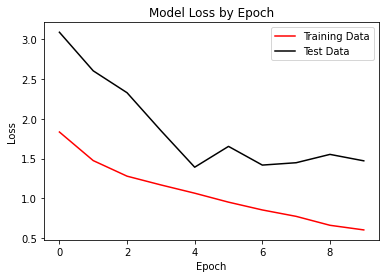

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
display(history)

Epoch 1/10
79/79 [==============================] - 19s 230ms/step - loss: 1.0386 - accuracy: 0.6306 - val_loss: 2.0878 - val_accuracy: 0.4040
Epoch 2/10
79/79 [==============================] - 16s 204ms/step - loss: 0.9346 - accuracy: 0.6696 - val_loss: 1.4273 - val_accuracy: 0.5412
Epoch 3/10
79/79 [==============================] - 22s 276ms/step - loss: 0.9016 - accuracy: 0.6800 - val_loss: 1.4295 - val_accuracy: 0.5409
Epoch 4/10
79/79 [==============================] - 17s 212ms/step - loss: 0.8796 - accuracy: 0.6930 - val_loss: 1.8546 - val_accuracy: 0.4726
Epoch 5/10
79/79 [==============================] - 17s 212ms/step - loss: 0.8607 - accuracy: 0.6992 - val_loss: 1.4059 - val_accuracy: 0.5561
Epoch 6/10
79/79 [==============================] - 17s 212ms/step - loss: 0.8390 - accuracy: 0.6990 - val_loss: 1.4105 - val_accuracy: 0.5558
Epoch 7/10
79/79 [==============================] - 17s 212ms/step - loss: 0.8056 - accuracy: 0.7196 - val_loss: 1.4795 - val_accuracy: 0.5367

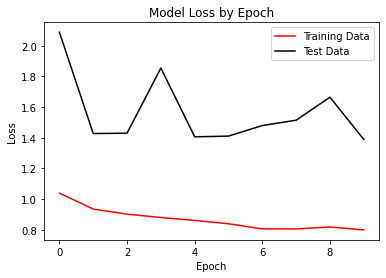

In [4]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3, height_shift_range=0.08, zoom_range=0.08)
test_gen = ImageDataGenerator()

train_generator = gen.flow(train_images, train_labels, batch_size=64)
test_generator = test_gen.flow(test_images, test_labels, batch_size=64)

history = model.fit(train_generator, epochs=10, validation_data=test_generator)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
display(history)